## Fauzan Taufik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_train = pd.read_csv('fraud_train.csv')

## Ekplolatory Data Analysis

In [17]:
df_train.shape

(13125, 28)

In [18]:
df_train.iloc[:, :10].head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0


In [10]:
df_train.iloc[:, 10:20].head()

,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel
0,96,5,265,4137,613,193955,4,2,1,9
1,96,5,121,1264,2196,73140,2,1,5,8
2,96,5,101,1283,2049,140216,3,1,5,8
3,96,5,239,7049,588,155117,3,2,2,4
4,96,5,69,3425,613,143339,3,2,1,9


In [11]:
df_train.iloc[:, 20:].head()

,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [33]:
df_train.iloc[:, :13].describe().round()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota
count,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0
mean,7508.0,2457490.0,2457541.0,85.0,39301.0,1678.0,1649037.0,179.0,11.0,1315219.0,96.0,5.0,148.0
std,4327.0,105.0,109.0,41.0,124188.0,361.0,991431.0,143.0,4.0,2838050.0,4.0,0.0,70.0
min,1.0,2457297.0,2457303.0,0.0,-2.0,2.0,-4.0,26.0,1.0,1.0,-2.0,1.0,1.0
25%,3784.0,2457404.0,2457451.0,93.0,-2.0,1798.0,1130699.0,26.0,9.0,200000.0,96.0,5.0,102.0
50%,7475.0,2457500.0,2457543.0,103.0,-2.0,1798.0,1836319.0,156.0,10.0,570000.0,96.0,5.0,128.0
75%,11265.0,2457581.0,2457632.0,111.0,-2.0,1798.0,2419350.0,301.0,11.0,1250000.0,96.0,5.0,203.0
max,15000.0,2457662.0,2457754.0,138.0,720990.0,1859.0,6928943.0,640.0,20.0,75000000.0,216.0,16.0,293.0


In [35]:
df_train.iloc[:, 13:28].describe().round()

,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13104.0,13104.0,13104.0,13104.0,13125.0
mean,3948.0,766.0,138896.0,3.0,2.0,1.0,8.0,3.0,999.0,1364132.0,12287603.0,76519.0,2.0,0.0
std,2406.0,466.0,47873.0,1.0,0.0,1.0,2.0,0.0,0.0,1448583.0,16459046.0,676539.0,1.0,0.0
min,2.0,1.0,47.0,1.0,1.0,1.0,3.0,3.0,999.0,50000.0,38000.0,1.0,1.0,0.0
25%,1914.0,613.0,102622.0,2.0,2.0,1.0,9.0,3.0,999.0,568563.0,2500000.0,25000.0,2.0,0.0
50%,3720.0,613.0,140707.0,3.0,2.0,1.0,9.0,3.0,999.0,1024239.0,6000000.0,36964.0,2.0,0.0
75%,5637.0,613.0,175420.0,3.0,2.0,1.0,9.0,3.0,999.0,1679778.0,15000000.0,63200.0,3.0,0.0
max,8697.0,2688.0,235914.0,4.0,2.0,5.0,9.0,3.0,999.0,24666667.0,100000000.0,75000000.0,20.0,1.0


In [36]:
df_train.id_merchant.value_counts()

-2         11307
 161601        9
 123189        8
 553188        8
 524899        7
 531225        6
 51625         6
 209105        6
 36481         6
 642400        6
 603443        5
 697578        5
 382698        5
 496151        5
 449171        5
 29802         5
 413720        5
 42375         5
 209077        5
 61023         5
 73176         5
 71041         5
 572293        4
 200705        4
 167191        4
 401431        4
 462191        4
 642569        4
 424508        4
 374848        4
           ...  
 117773        1
 50132         1
 33716         1
 411148        1
 28201         1
 163893        1
 300878        1
 677926        1
 73761         1
 112658        1
 190480        1
 389131        1
 112626        1
 104414        1
 440266        1
 57223         1
 438097        1
 177978        1
 286255        1
 513830        1
 472866        1
 304904        1
 298749        1
 118453        1
 93865         1
 106087        1
 267854        1
 542276       

In [37]:
df_train.tipe_mesin.value_counts()

-3          883
 1529252     30
 1919585     25
 1222429     23
 502272      21
 1564130     19
 1959973     18
 2849097     18
 1192143     17
 357028      17
 1944883     17
 334508      16
 1804832     16
 1455294     16
 2432939     15
 2148930     15
 2018536     15
 2044389     15
 2132716     15
 2309778     15
 1289502     15
 2421258     14
 2337114     14
 2448890     14
 2812417     14
 1154046     14
 2376195     13
 2069723     13
 2751069     13
 2348934     13
           ... 
 1589301      1
 2689421      1
 2796153      1
 2423315      1
 90648        1
 3216070      1
 3175018      1
 2155200      1
 3005119      1
 700          1
 2882219      1
 3115685      1
 82596        1
 1180308      1
 2157201      1
 1575557      1
 2669171      1
 2724446      1
 510493       1
 2525789      1
 2601562      1
 2550361      1
 2404930      1
 3091009      1
 3291707      1
 1782330      1
 3024060      1
 90664        1
 2802212      1
 2426881      1
Name: tipe_mesin, Length

In [39]:
df_train.id_negara.value_counts()

 96     13081
 73        11
 149       10
 104        5
-2          4
 157        3
 216        3
 188        2
 168        2
 183        1
 45         1
 57         1
 64         1
Name: id_negara, dtype: int64

In [42]:
df_train['id_merchant']=df_train['id_merchant'].apply(lambda row : 'odd' if row<0 else 'normal')
df_train['tipe_mesin'] = df_train['tipe_mesin'].apply(lambda row : 'odd' if row <= 0 else 'normal')

In [43]:
df_train.nunique()

X                             8793
id_tanggal_transaksi_awal      360
tanggal_transaksi_awal         452
tipe_kartu                      14
id_merchant                      2
nama_merchant                 1105
tipe_mesin                       2
tipe_transaksi                  20
nama_transaksi                  20
nilai_transaksi               1425
id_negara                       13
nama_negara                     12
nama_kota                      229
lokasi_mesin                  5814
pemilik_mesin                 1666
waktu_transaksi               7952
kuartal_transaksi                4
kepemilikan_kartu                2
nama_channel                     5
id_channel                       4
flag_transaksi_finansial         1
status_transaksi                 1
bank_pemilik_kartu               1
rata_rata_nilai_transaksi     3090
maksimum_nilai_transaksi       804
minimum_nilai_transaksi        754
rata_rata_jumlah_transaksi     371
flag_transaksi_fraud             2
dtype: int64

In [44]:
#Drop Redundant feature and unrelevant feature

df_train = df_train.drop(['id_tanggal_transaksi_awal', 'tanggal_transaksi_awal', 'id_negara', 'nama_negara', 'lokasi_mesin',
              'nama_merchant', 'pemilik_mesin', 'nama_transaksi', 'id_channel', 'tipe_kartu'], axis=1)

In [22]:
df_train.shape

(13125, 18)

In [45]:
df_train.describe().round()

,X,tipe_transaksi,nilai_transaksi,nama_kota,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13125.0,13104.0,13104.0,13104.0,13104.0,13125.0
mean,7508.0,179.0,1315219.0,148.0,138896.0,3.0,2.0,1.0,3.0,999.0,1364132.0,12287603.0,76519.0,2.0,0.0
std,4327.0,143.0,2838050.0,70.0,47873.0,1.0,0.0,1.0,0.0,0.0,1448583.0,16459046.0,676539.0,1.0,0.0
min,1.0,26.0,1.0,1.0,47.0,1.0,1.0,1.0,3.0,999.0,50000.0,38000.0,1.0,1.0,0.0
25%,3784.0,26.0,200000.0,102.0,102622.0,2.0,2.0,1.0,3.0,999.0,568563.0,2500000.0,25000.0,2.0,0.0
50%,7475.0,156.0,570000.0,128.0,140707.0,3.0,2.0,1.0,3.0,999.0,1024239.0,6000000.0,36964.0,2.0,0.0
75%,11265.0,301.0,1250000.0,203.0,175420.0,3.0,2.0,1.0,3.0,999.0,1679778.0,15000000.0,63200.0,3.0,0.0
max,15000.0,640.0,75000000.0,293.0,235914.0,4.0,2.0,5.0,3.0,999.0,24666667.0,100000000.0,75000000.0,20.0,1.0


In [48]:
#multicollinearity
df_train.drop(['status_transaksi', 'bank_pemilik_kartu'], axis=1, inplace=True)

In [55]:
df_train['kepemilikan_kartu'] = df_train['kepemilikan_kartu'].astype('category')
df_train['nama_channel'] = df_train['nama_channel'].astype('category')
df_train['id_merchant'] = df_train['id_merchant'].astype('category')
df_train['tipe_transaksi'] = df_train['tipe_transaksi'].astype('category')
df_train['nama_kota'] = df_train['nama_kota'].astype('category')
df_train['tipe_mesin'] = df_train['tipe_mesin'].astype('category')
df_train['kuartal_transaksi'] = df_train['kuartal_transaksi'].astype('category')

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
X                             13125 non-null int64
id_merchant                   13125 non-null category
tipe_mesin                    13125 non-null category
tipe_transaksi                13125 non-null category
nilai_transaksi               13125 non-null float64
nama_kota                     13125 non-null category
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null category
kepemilikan_kartu             13125 non-null category
nama_channel                  13125 non-null category
flag_transaksi_finansial      13125 non-null bool
rata_rata_nilai_transaksi     13104 non-null float64
maksimum_nilai_transaksi      13104 non-null float64
minimum_nilai_transaksi       13104 non-null float64
rata_rata_jumlah_transaksi    13104 non-null float64
flag_transaksi_fraud          13125 non-null int32
dtypes: bool(1), category(7), float64(5), int

In [60]:
sum_x_fraud = df_train.groupby('X')['flag_transaksi_fraud'].sum()

In [69]:
df_train = df_train.join(sum_x_fraud, how='left', on='X', lsuffix='', rsuffix='_sum_x')

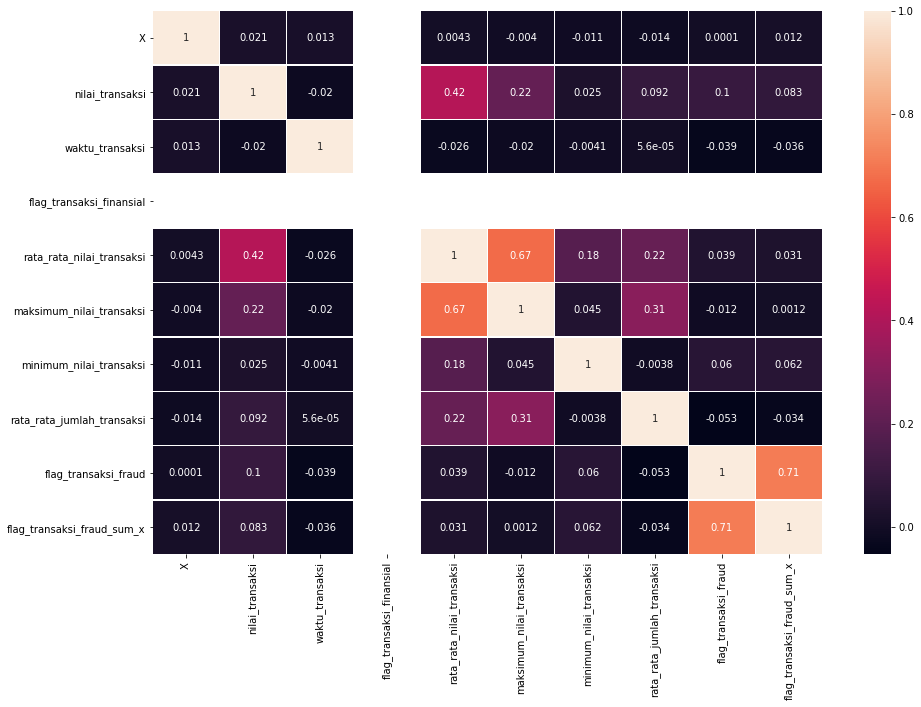

In [74]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(), annot=True, linewidth=0.4)
plt.show()

In [77]:
df_train.drop('X', axis=1, inplace=True)

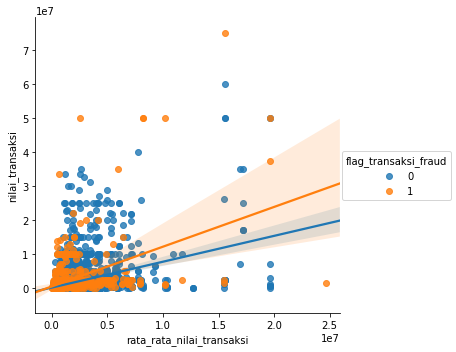

In [90]:
sns.lmplot('rata_rata_nilai_transaksi', 'nilai_transaksi', data=df_train, hue='flag_transaksi_fraud')
plt.show()

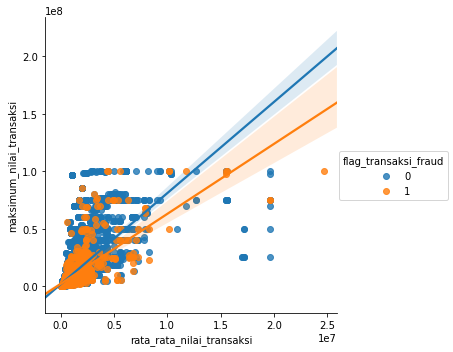

In [91]:
sns.lmplot('rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', data=df_train, hue='flag_transaksi_fraud')
plt.show()

In [92]:
df_train.isnull().sum()

id_merchant                    0
tipe_mesin                     0
tipe_transaksi                 0
nilai_transaksi                0
nama_kota                      0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
flag_transaksi_finansial       0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
flag_transaksi_fraud_sum_x     0
dtype: int64

In [100]:
numeric =['nilai_transaksi',
 'waktu_transaksi',
 'rata_rata_nilai_transaksi',
 'maksimum_nilai_transaksi',
 'minimum_nilai_transaksi',
 'rata_rata_jumlah_transaksi']

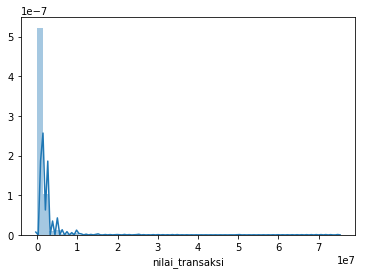

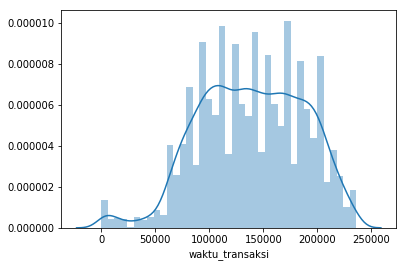

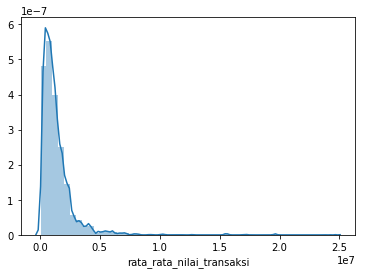

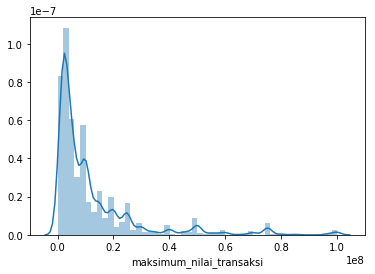

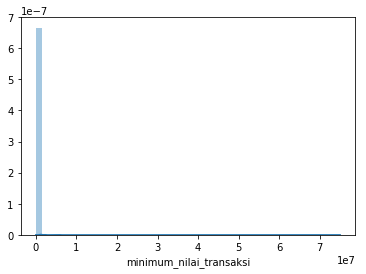

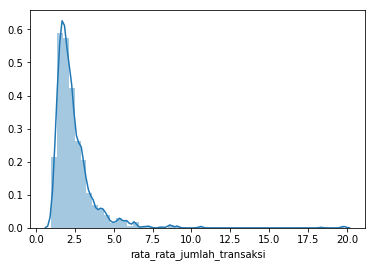

In [106]:
for col in numeric :
    sns.distplot(df_train[col].dropna())
    plt.show()

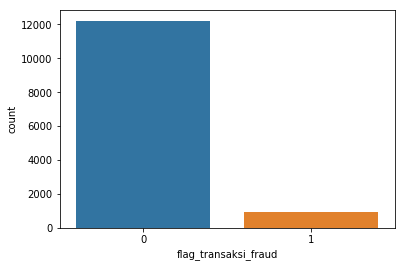

In [118]:
sns.countplot(df_train.flag_transaksi_fraud)
plt.show()

In [120]:
(df_train.flag_transaksi_fraud.value_counts()/len(df_train))*100

0    93.066667
1     6.933333
Name: flag_transaksi_fraud, dtype: float64

In [93]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [107]:
%who

TSNE	 col	 df_train	 np	 numeric	 pd	 plt	 sns	 sum_x_fraud	 
tsne_feature	 vis_2d	 xs	 ys	 


In [214]:
df_train.flag_transaksi_finansial = df_train.flag_transaksi_finansial.astype('category')
df_train.to_csv('train_done_prepare.csv')

## Data Preparation And Modeling

### Logistic Regression with Weighting

In [138]:
"""Imputing Missing Value"""

col_missing = ['rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']

for col in col_missing :
    df_train[col] = df_train[col].fillna(df_train[col].mean())

In [139]:
"""CHECK FOR MULTICOLINEARITY"""

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

train = df_train.drop('flag_transaksi_fraud', axis=1)

numeric_train = df_train[numeric + ['flag_transaksi_fraud_sum_x']]
X = add_constant(numeric_train)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                         13.202072
nilai_transaksi                1.237574
waktu_transaksi                1.002043
rata_rata_nilai_transaksi      2.243985
maksimum_nilai_transaksi       1.969483
minimum_nilai_transaksi        1.056512
rata_rata_jumlah_transaksi     1.109100
flag_transaksi_fraud_sum_x     1.013610
dtype: float64

In [149]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

y = df_train.flag_transaksi_fraud
X = pd.get_dummies(train, drop_first=True)
scaler = RobustScaler()
lr = LogisticRegression(penalty='l1')
rfecv = RFECV(lr, cv=5, scoring='roc_auc', n_jobs=-1)

pipe = Pipeline([('scaler',scaler), ('rfecv', rfecv)])
result = pipe.fit(X, y)

In [155]:
print(rfecv.n_features_)
print(X.columns[rfecv.support_])

43
Index(['nilai_transaksi', 'waktu_transaksi', 'maksimum_nilai_transaksi',
       'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi',
       'flag_transaksi_fraud_sum_x', 'tipe_transaksi_58', 'tipe_transaksi_148',
       'tipe_transaksi_159', 'tipe_transaksi_227', 'tipe_transaksi_301',
       'tipe_transaksi_385', 'nama_kota_57', 'nama_kota_63', 'nama_kota_70',
       'nama_kota_75', 'nama_kota_89', 'nama_kota_101', 'nama_kota_102',
       'nama_kota_112', 'nama_kota_114', 'nama_kota_128', 'nama_kota_134',
       'nama_kota_136', 'nama_kota_140', 'nama_kota_152', 'nama_kota_185',
       'nama_kota_189', 'nama_kota_203', 'nama_kota_210', 'nama_kota_218',
       'nama_kota_221', 'nama_kota_237', 'nama_kota_241', 'nama_kota_244',
       'nama_kota_265', 'nama_kota_273', 'nama_kota_293',
       'kuartal_transaksi_2', 'kuartal_transaksi_3', 'kuartal_transaksi_4',
       'kepemilikan_kartu_2', 'nama_channel_5'],
      dtype='object')


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y , random_state=42)

weights = np.linspace(0.05, 0.95, 20)

lr_2 = LogisticRegression(penalty='l1')
params = {'C':np.arange(0.05, 1, 0.3), 'class_weight':[{0: x, 1: 1.0-x} for x in weights]}

grid_model = GridSearchCV(lr_2, params, scoring='roc_auc', cv=5, n_jobs=-1)
grid_model.fit(x_train, y_train)

print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 0.95, 'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}
0.9839152399558888


In [181]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

y_pred = grid_model.predict(x_test)
score = roc_auc_score(y_test, y_pred)

print(score)

0.9731887024150634


In [182]:
confusion_matrix(y_test, y_pred)

array([[2312,  131],
       [   0,  182]], dtype=int64)

In [184]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      2443
          1       0.58      1.00      0.74       182

avg / total       0.97      0.95      0.96      2625



In [187]:
y_pred_prob = grid_model.predict_proba(x_test)

In [196]:
y_pred_prob

array([[0.99459322, 0.00540678],
       [0.99589973, 0.00410027],
       [0.99856112, 0.00143888],
       ...,
       [0.99680718, 0.00319282],
       [0.99705919, 0.00294081],
       [0.29691734, 0.70308266]])

In [206]:
pred_1 = []
for x1, x2 in y_pred_prob :
    pred_1.append(x2)

In [213]:
roc_auc_score(y_test, pred_1)

0.9868586182544431

## Logistic Regression with SMOTE

In [233]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

ratio = np.linspace(0.005, 0.05, 10)

params = {'lr_2__C':np.arange(0.05, 1, 0.3), 'smote__ratio': ratio}

pipe = Pipeline([('smote', SMOTE()), ('lr_2', LogisticRegression(penalty='l1'))])

grid_model2 = GridSearchCV(pipe, params, cv=5, scoring='roc_auc', n_jobs=-1)

grid_model2.fit(x_train, y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform. 'SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)' (type <class 'imblearn.over_sampling.smote.SMOTE'>) doesn't